In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt

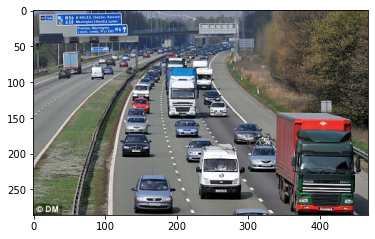

In [2]:
car = cv2.imread("../Images/car.jpg")
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
plt.imshow(car)
plt.show()

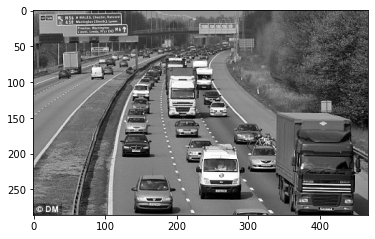

In [3]:
car_gray = cv2.cvtColor(car, cv2.COLOR_RGB2GRAY)
plt.imshow(car_gray,cmap='gray')
plt.show()

In [4]:
car_detector = cv2.CascadeClassifier("../Cascades/cars.xml")

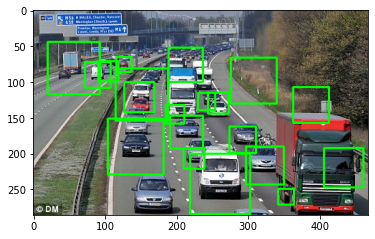

In [5]:
car = cv2.imread("../Images/car.jpg")
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
car_gray = cv2.cvtColor(car, cv2.COLOR_RGB2GRAY)
car_detections = car_detector.detectMultiScale(car_gray,
                                               scaleFactor = 1.01)
for (x,y,w,h) in car_detections:
    cv2.rectangle(car,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(car)
plt.show()

In [6]:
clock_detector = cv2.CascadeClassifier("../Cascades/clocks.xml")

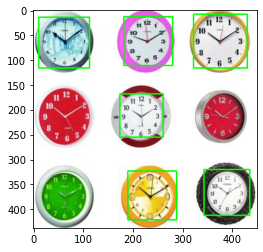

In [7]:
clock = cv2.imread("../Images/clock.jpg")
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2RGB)
clock_gray = cv2.cvtColor(clock, cv2.COLOR_RGB2GRAY)
clock_detections = clock_detector.detectMultiScale(clock_gray,
                                                   scaleFactor = 1.04)
for (x,y,w,h) in clock_detections:
    cv2.rectangle(clock,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(clock)
plt.show()

In [8]:
fullbody_detector = cv2.CascadeClassifier("../Cascades/fullbody.xml")

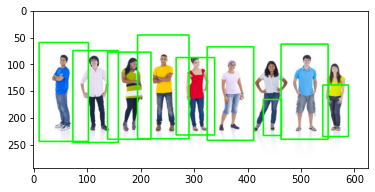

In [9]:
people = cv2.imread("../Images/people3.jpg")
people = cv2.cvtColor(people, cv2.COLOR_BGR2RGB)
people_gray = cv2.cvtColor(people, cv2.COLOR_RGB2GRAY)
people_detections = fullbody_detector.detectMultiScale(people_gray,
                                                   scaleFactor = 1.045,
                                                      minNeighbors=5)
for (x,y,w,h) in people_detections:
    cv2.rectangle(people,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(people)
plt.show()

### Comparing

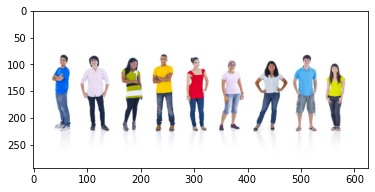

In [10]:
image = cv2.imread("../Images/people3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

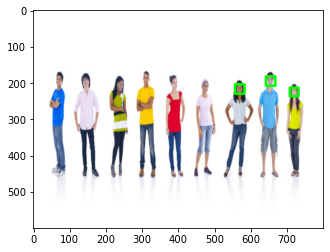

In [11]:
face_detector_cascade = cv2.CascadeClassifier("../Cascades/haarcascade_frontalface_default.xml")

image = cv2.imread("../Images/people3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(800,600))
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
detections = face_detector_cascade.detectMultiScale(image_gray,
                                            scaleFactor = 1.09)
for (x,y,w,h) in detections:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(image)
plt.show()

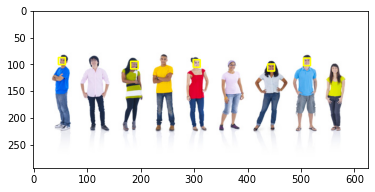

In [12]:
face_detector_hog = dlib.get_frontal_face_detector()

image = cv2.imread("../Images/people3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detections = face_detector_hog(image,4)
for face in detections:
    l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
    cv2.rectangle(image,(l,t),(r,b),(255,255,0),2)
plt.imshow(image)
plt.show()

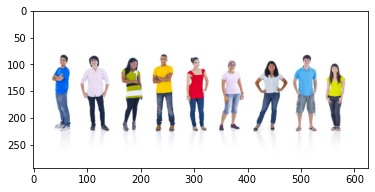

In [13]:
face_detector_cnn = dlib.cnn_face_detection_model_v1("../Weights/mmod_human_face_detector.dat")

image = cv2.imread("../Images/people3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detections = face_detector_cnn(image,2)
for face in detections:
    l,t = face.rect.left(),face.rect.top()
    r,b = face.rect.right(),face.rect.bottom()
    c = face.confidence
    cv2.rectangle(image,(l,t),(r,b),(255,255,0),2)
    cv2.putText(image,f"{c:.2f}",(l,t),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),2)
plt.imshow(image)
plt.show()